In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [5]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding = "ISO-8859-1")

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
df.value_counts()

v1   v2                                                                                                                                               Unnamed: 2                                                                    Unnamed: 3                                Unnamed: 4                                              
ham  Edison has rightly said, \A fool can ask more questions than a wise man can answer\" Now you know why all of us are speechless during ViVa.. GM  GN                                                                            GE                                        GNT:-)"                                                     2
     \Wen u miss someone                                                                                                                               the person is definitely special for u..... But if the person is so special   why to miss them                          just Keep-in-touch\" gdeve.."                              1
     \HEY

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df['Unnamed: 2'].value_counts()

 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                   3
 don't miss ur best life for anything... Gud nyt..."                                                                                                2
GN                                                                                                                                                  2
 PO Box 5249                                                                                                                                        2
this wont even start........ Datz confidence.."                                                                                                     2
 but dont try to prove it..\" .Gud noon...."                                                                                                        2
PROBPOP IN & CU SATTHEN HUNNY 4BREKKIE! LOVE JEN XXX. PSXTRA LRG PORTIONS 4 ME PLEASE \""           

In [11]:
df['Unnamed: 2'].nunique()

43

In [16]:
df['Unnamed: 3'].nunique()

10

In [17]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
df['v1'] = df['v1'].replace({'ham' : 0 , 'spam' : 1})

In [19]:
df['v1'].value_counts()

0    4825
1     747
Name: v1, dtype: int64

In [20]:
#on va traiter la colonne ""v2""

In [21]:
import nltk

In [23]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
from nltk.corpus import stopwords

In [34]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
df['len']=df['v2'].apply(len)

In [49]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [50]:
df.head()

,v1,v2,len
0,0,go jurong point crazy.. available bugis n grea...,92
1,0,ok lar ... joking wif u oni ...,31
2,1,free entry 2 wkly comp win fa cup final tkts 2...,140
3,0,u dun say early hor ... u c already say ...,43
4,0,nah n't think goes usf lives around though,42


Text(0.5, 1.0, 'Length Histogram')

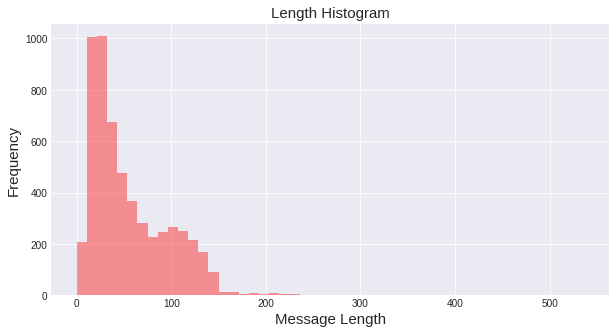

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,5))
sns.distplot(df['len'],kde=False,color='red',hist=True)
plt.xlabel("Message Length",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Length Histogram",size=15)

In [54]:
from nltk.stem.porter import PorterStemmer
import re

In [56]:
ps = PorterStemmer() #pour "text preprocessing"

message = []

for i in range(0, df.shape[0]):
    #accepter que les mots alphabétiques
    review = re.sub('[^a-zA-Z]', ' ', df['v2'][i])
    #convertir tous minuscule
    review = review.lower()
    #splitter chaque ligne
    review = review.split()
    #
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    #construire de nouveau la ligne
    review = ' '.join(review)
    message.append(review)

In [57]:
df['clean_msg']=np.empty((len(message),1))
for i in range(len(message)):
    df['clean_msg'][i]=message[i]
df['clean_msg_len']=df['clean_msg'].apply(len)
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,v1,v2,len,clean_msg,clean_msg_len
0,0,go jurong point crazy.. available bugis n grea...,92,go jurong point crazi avail bugi n great world...,76
1,0,ok lar ... joking wif u oni ...,31,ok lar joke wif u oni,21
2,1,free entry 2 wkly comp win fa cup final tkts 2...,140,free entri wkli comp win fa cup final tkt st m...,99
3,0,u dun say early hor ... u c already say ...,43,u dun say earli hor u c alreadi say,35
4,0,nah n't think goes usf lives around though,42,nah n think goe usf live around though,38


In [58]:
df['v2'].describe()

count                     5572
unique                    5126
top       sorry 'll call later
freq                        30
Name: v2, dtype: object

In [59]:
df['clean_msg'].describe()

count                 5572
unique                5056
top       sorri call later
freq                    30
Name: clean_msg, dtype: object

In [60]:
df.rename(columns={'v1':'label' , 'v2' : 'Msg'},inplace=True)

In [61]:
df.head()

,label,Msg,len,clean_msg,clean_msg_len
0,0,go jurong point crazy.. available bugis n grea...,92,go jurong point crazi avail bugi n great world...,76
1,0,ok lar ... joking wif u oni ...,31,ok lar joke wif u oni,21
2,1,free entry 2 wkly comp win fa cup final tkts 2...,140,free entri wkli comp win fa cup final tkt st m...,99
3,0,u dun say early hor ... u c already say ...,43,u dun say earli hor u c alreadi say,35
4,0,nah n't think goes usf lives around though,42,nah n think goe usf live around though,38


In [62]:
X=df['clean_msg']

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(message).toarray()

In [66]:
Y=np.array(df['label'])

In [67]:
#training model

In [68]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [75]:
#modéle1

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rfc = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=42)

In [85]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [86]:
y_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9802690582959641

In [80]:
#c'est trés bien , mais on va aussi essayer avec d'autres méthodes

In [87]:
#modéle2

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier(random_state=42, n_estimators=100,min_samples_split=100)
gbk.fit(x_train, y_train)
gbk_predict = gbk.predict(x_test)
print("Gradient Boosting Score :",accuracy_score(y_test,gbk_predict ))

Gradient Boosting Score : 0.9641255605381166


In [ ]:
#modéle3

In [93]:
from sklearn.neighbors import KNeighborsClassifier
mx=-1
for i in range(1,25):
    
    neigh=KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    KNN_score=accuracy_score(y_test, yhat)
    print("KNN Accuracy at {} is {}".format(i,KNN_score))
    mx=max(mx,KNN_score)
    print("\n")
mx

NameError: name 'metrics' is not defined